In [39]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import numpy as np
from keras import backend as K
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix
import numpy as np
from keras import backend as K
import tensorflow as tf
from sklearn.inspection import permutation_importance
#import dill


**Load the dataset**

In [58]:
multiclass_test = pd.read_csv(r'C:\Users\Fra\Documents\SDS\SML\DATASET PROGETTO\multiclass_test.csv',header= 0)
multiclass_training = pd.read_csv(r'C:\Users\Fra\Documents\SDS\SML\DATASET PROGETTO\multiclass_training.csv', header= 0)

In [59]:
multiclass_training.head()

,Unnamed: 0,DepMap_ID,A1BG..1.,A1CF..29974.,A2M..2.,A2ML1..144568.,A3GALT2..127550.,A4GALT..53947.,A4GNT..51146.,AAAS..8086.,...,ZWINT..11130.,ZXDA..7789.,ZXDB..158586.,ZXDC..79364.,ZYG11A..440590.,ZYG11B..79699.,ZYX..7791.,ZZEF1..23140.,ZZZ3..26009.,label
0,212,ACH-000352,0.031560,0.020701,0.024027,0.015165,0.083180,0.045681,0.152042,0.440972,...,0.877840,0.002812,0.017894,0.020636,0.020332,0.138445,0.012091,0.049077,0.545678,5
1,619,ACH-000966,0.014205,0.102370,0.043301,0.130849,0.032096,0.105158,0.106484,0.123385,...,0.894899,0.012680,0.015837,0.017439,0.101407,0.097252,0.007967,0.088759,0.192388,2
2,970,ACH-002181,0.091952,0.074313,0.012798,0.005650,0.111340,0.077014,0.055757,0.287227,...,0.942884,0.015960,0.021886,0.141327,0.033790,0.537413,0.106558,0.065613,0.412021,2
3,267,ACH-000435,0.014217,0.088321,0.027686,0.008344,0.143408,0.022670,0.012488,0.332068,...,0.250682,0.013639,0.011824,0.032894,0.051714,0.051038,0.019694,0.128508,0.545724,2
4,192,ACH-000322,0.038509,0.092706,0.046166,0.026288,0.378282,0.032907,0.106303,0.080718,...,0.077104,0.116839,0.054943,0.043476,0.051321,0.131123,0.066249,0.353908,0.429934,3


In [60]:
y_test = pd.get_dummies(multiclass_test, columns = ['label']).iloc[:,17395:17405]
X_train = np.array(multiclass_training.drop(['label','Unnamed: 0','DepMap_ID'], axis = 1))
y_train = pd.get_dummies(multiclass_training, columns = ['label']).iloc[:,17395:17405]
X_test = np.array(multiclass_test.drop(['label','DepMap_ID','Unnamed: 0'], axis = 1))

In [61]:
X_train_reshaped = X_train.reshape(816,17393)
X_test_reshaped = X_test.reshape(204,17393)

**First model**

In [62]:
model = Sequential()

model.add(Dense(200, input_shape=(17393,)))
model.add(Activation('relu'))
#model.add(Dropout(0.25))


model.add(Dense(10))
model.add(Activation('softmax'))
#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 5, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model0.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =30,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))

#in multiclass possiamo aggiungere la softmax come activation function in modo da aumentare la probabilità che solo
#un nodo di uscita venga scelto ogni volta
#se per caso due possibili risultati sono anche parzialmente sovrapponibili si usa come activation function sigmoid

Epoch 1/30
25/26 [===========================>..] - ETA: 0s - loss: 3.5023 - accuracy: 0.1963
Epoch 00001: saving model to best_model.hdf5
26/26 [==============================] - 1s 23ms/step - loss: 3.4737 - accuracy: 0.1949 - val_loss: 2.0918 - val_accuracy: 0.2206
Epoch 2/30
25/26 [===========================>..] - ETA: 0s - loss: 1.9339 - accuracy: 0.2912
Epoch 00002: saving model to best_model.hdf5
26/26 [==============================] - 0s 17ms/step - loss: 1.9313 - accuracy: 0.2941 - val_loss: 1.9014 - val_accuracy: 0.3480
Epoch 3/30
25/26 [===========================>..] - ETA: 0s - loss: 1.6829 - accuracy: 0.4663
Epoch 00003: saving model to best_model.hdf5
26/26 [==============================] - 0s 17ms/step - loss: 1.6843 - accuracy: 0.4620 - val_loss: 1.8051 - val_accuracy: 0.3725
Epoch 4/30
25/26 [===========================>..] - ETA: 0s - loss: 1.4145 - accuracy: 0.6050
Epoch 00004: saving model to best_model.hdf5
26/26 [==============================] - 0s 18ms/step 

**More complex model: increase width and depth**

In [67]:
model = Sequential()

#1°layer
model.add(Dense(400, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(10))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model1.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =70,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/100
26/26 [==============================] - ETA: 0s - loss: 2.9926 - accuracy: 0.1703
Epoch 00001: val_accuracy improved from -inf to 0.15196, saving model to best_model1.hdf5
26/26 [==============================] - 1s 37ms/step - loss: 2.9926 - accuracy: 0.1703 - val_loss: 2.1385 - val_accuracy: 0.1520
Epoch 2/100
26/26 [==============================] - ETA: 0s - loss: 2.1360 - accuracy: 0.2108
Epoch 00002: val_accuracy improved from 0.15196 to 0.21569, saving model to best_model1.hdf5
26/26 [==============================] - 1s 33ms/step - loss: 2.1360 - accuracy: 0.2108 - val_loss: 2.0389 - val_accuracy: 0.2157
Epoch 3/100
25/26 [===========================>..] - ETA: 0s - loss: 1.9470 - accuracy: 0.3025
Epoch 00003: val_accuracy improved from 0.21569 to 0.29412, saving model to best_model1.hdf5
26/26 [==============================] - 1s 34ms/step - loss: 1.9430 - accuracy: 0.3051 - val_loss: 1.9358 - val_accuracy: 0.2941
Epoch 4/100
24/26 [==========================>...

Epoch 29/100
25/26 [===========================>..] - ETA: 0s - loss: 0.3170 - accuracy: 0.8813
Epoch 00029: val_accuracy did not improve from 0.57843
26/26 [==============================] - 1s 27ms/step - loss: 0.3214 - accuracy: 0.8787 - val_loss: 1.6734 - val_accuracy: 0.5539
Epoch 30/100
26/26 [==============================] - ETA: 0s - loss: 0.3234 - accuracy: 0.8701
Epoch 00030: val_accuracy improved from 0.57843 to 0.59804, saving model to best_model1.hdf5
26/26 [==============================] - 1s 31ms/step - loss: 0.3234 - accuracy: 0.8701 - val_loss: 1.3862 - val_accuracy: 0.5980
Epoch 31/100
25/26 [===========================>..] - ETA: 0s - loss: 0.2913 - accuracy: 0.8950
Epoch 00031: val_accuracy did not improve from 0.59804
26/26 [==============================] - 1s 26ms/step - loss: 0.2913 - accuracy: 0.8946 - val_loss: 1.5473 - val_accuracy: 0.5784
Epoch 32/100
24/26 [==========================>...] - ETA: 0s - loss: 0.2990 - accuracy: 0.8919
Epoch 00032: val_accura

Epoch 58/100
26/26 [==============================] - ETA: 0s - loss: 0.1848 - accuracy: 0.9252
Epoch 00058: val_accuracy did not improve from 0.61765
26/26 [==============================] - 1s 27ms/step - loss: 0.1848 - accuracy: 0.9252 - val_loss: 1.8815 - val_accuracy: 0.6127
Epoch 59/100
25/26 [===========================>..] - ETA: 0s - loss: 0.2136 - accuracy: 0.9200
Epoch 00059: val_accuracy did not improve from 0.61765
26/26 [==============================] - 1s 27ms/step - loss: 0.2153 - accuracy: 0.9167 - val_loss: 1.7120 - val_accuracy: 0.5882
Epoch 60/100
25/26 [===========================>..] - ETA: 0s - loss: 0.2604 - accuracy: 0.9087
Epoch 00060: val_accuracy did not improve from 0.61765
26/26 [==============================] - 1s 28ms/step - loss: 0.2599 - accuracy: 0.9081 - val_loss: 1.8827 - val_accuracy: 0.5931
Epoch 61/100
25/26 [===========================>..] - ETA: 0s - loss: 0.2491 - accuracy: 0.9137
Epoch 00061: val_accuracy did not improve from 0.61765
26/26 

**Performance on test**

In [64]:
#Create the vectors that contains the Cancers chosen (Cancer_Type2) and the one observed (Cancer_Type)
Cancer_Type = ["Eye","Gastrointestinal","Genitals","Muscle-Bone","Neuro","Breast","Head_Neck","Blood",
               "Genitourinary", "Lung"] 


- Eye: 0

- Gastrointestinal: 1

- Genitals: 2

- Muscle-Bone: 3

- Neuro: 4

- Breast: 5

- Head_Neck: 6

- Blood: 7

- Urinario: 8

- Lung: 9

In [68]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                fontsize = 15,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

In [69]:
best_model1 = load_model('best_model1.hdf5')
y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred, dummy_na=True)
y_pred = y_pred.T.reindex(range(10)).T.fillna(0)

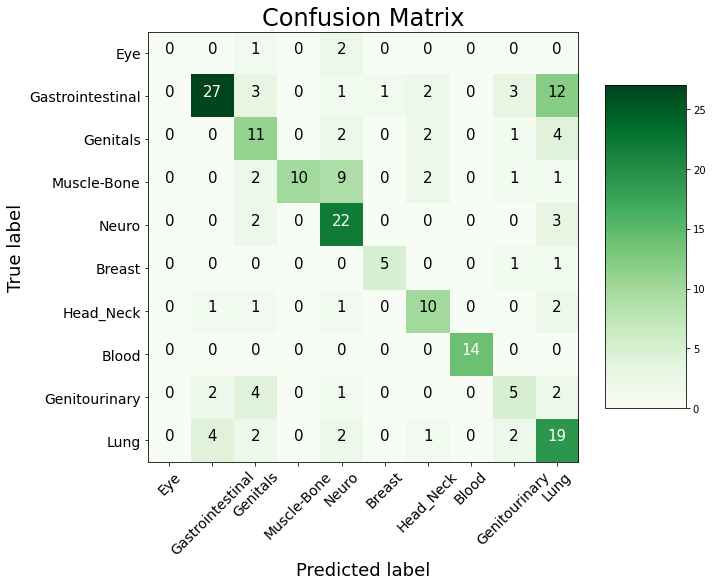

In [70]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')


**Try the same but with focal loss**

![Focal loss](https://lh4.googleusercontent.com/_Zb8VyevBHbPdlPS1Bcph18b0GnRdY__yrSWaxEobHAOSq5izCVXdRS0Eo-26pU5Q8JE2daQAmFlwwUKnRiaf7JJrv7VJOLXbTOF-B6G8yshVWdBwhRXFBuMB5L6eH7KCTjzen-t7e39pxku5A)

In [71]:

def categorical_focal_loss(alpha, gamma=2.):
    """
    Softmax version of focal loss.
    When there is a skew between different categories/labels in your data set, you can try to apply this function as a
    loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy. Alpha is used to specify the weight of different
      categories/labels, the size of the array needs to be consistent with the number of classes.
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """
        y_true = tf.cast(y_true, tf.float32)
        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed

In [72]:
model = Sequential()

#1°layer
model.add(Dense(400, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(10))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', metrics=['accuracy'], 
    loss=[categorical_focal_loss(alpha=[.25, .25, .25, .25, .25, .25, .25, .25, .25, .25], gamma=2)])

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model_2.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =100,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/100
26/26 [==============================] - ETA: 0s - loss: 0.7083 - accuracy: 0.1483
Epoch 00001: val_accuracy improved from -inf to 0.23039, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 38ms/step - loss: 0.7083 - accuracy: 0.1483 - val_loss: 0.4203 - val_accuracy: 0.2304
Epoch 2/100
24/26 [==========================>...] - ETA: 0s - loss: 0.4135 - accuracy: 0.2331
Epoch 00002: val_accuracy improved from 0.23039 to 0.25490, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 33ms/step - loss: 0.4107 - accuracy: 0.2353 - val_loss: 0.3857 - val_accuracy: 0.2549
Epoch 3/100
25/26 [===========================>..] - ETA: 0s - loss: 0.3707 - accuracy: 0.2988
Epoch 00003: val_accuracy improved from 0.25490 to 0.29902, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 34ms/step - loss: 0.3705 - accuracy: 0.2953 - val_loss: 0.3606 - val_accuracy: 0.2990
Epoch 4/100
24/26 [==========================>

Epoch 29/100
26/26 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.8787
Epoch 00029: val_accuracy did not improve from 0.59804
26/26 [==============================] - 1s 27ms/step - loss: 0.0351 - accuracy: 0.8787 - val_loss: 0.2373 - val_accuracy: 0.5931
Epoch 30/100
25/26 [===========================>..] - ETA: 0s - loss: 0.0278 - accuracy: 0.9100
Epoch 00030: val_accuracy improved from 0.59804 to 0.60294, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 31ms/step - loss: 0.0274 - accuracy: 0.9105 - val_loss: 0.2623 - val_accuracy: 0.6029
Epoch 31/100
24/26 [==========================>...] - ETA: 0s - loss: 0.0260 - accuracy: 0.9193
Epoch 00031: val_accuracy did not improve from 0.60294
26/26 [==============================] - 1s 28ms/step - loss: 0.0275 - accuracy: 0.9154 - val_loss: 0.2957 - val_accuracy: 0.5539
Epoch 32/100
24/26 [==========================>...] - ETA: 0s - loss: 0.0368 - accuracy: 0.8737
Epoch 00032: val_accur

In [73]:
best_model_2 = load_model('best_model_2.hdf5', compile=False)
y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred, dummy_na=True)
y_pred = y_pred.T.reindex(range(10)).T.fillna(0)

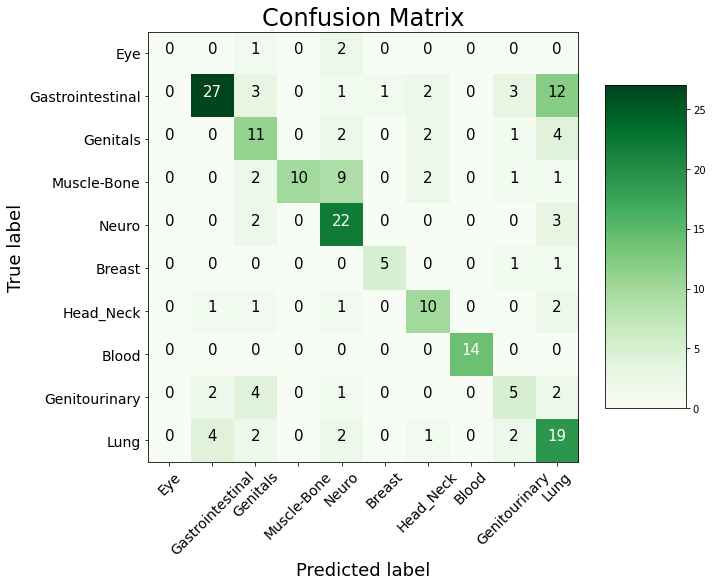

In [74]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')




**Try the same but adjust alpha paramter wrt class percentage**

In [75]:
n_obs = cm.sum(axis=1)
class_perc = n_obs/sum(n_obs)

In [81]:
model = Sequential()

#1°layer
model.add(Dense(400, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(10))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', metrics=['accuracy'], 
    loss=[categorical_focal_loss(alpha=class_perc, gamma=2)])

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model_2.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =70,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/70
24/26 [==========================>...] - ETA: 0s - loss: 0.3637 - accuracy: 0.1693
Epoch 00001: val_accuracy improved from -inf to 0.24020, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 37ms/step - loss: 0.3540 - accuracy: 0.1703 - val_loss: 0.1770 - val_accuracy: 0.2402
Epoch 2/70
24/26 [==========================>...] - ETA: 0s - loss: 0.1848 - accuracy: 0.2305
Epoch 00002: val_accuracy improved from 0.24020 to 0.25000, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 32ms/step - loss: 0.1834 - accuracy: 0.2316 - val_loss: 0.1625 - val_accuracy: 0.2500
Epoch 3/70
25/26 [===========================>..] - ETA: 0s - loss: 0.1580 - accuracy: 0.2738
Epoch 00003: val_accuracy improved from 0.25000 to 0.25490, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 33ms/step - loss: 0.1578 - accuracy: 0.2721 - val_loss: 0.1498 - val_accuracy: 0.2549
Epoch 4/70
24/26 [==========================>...]

Epoch 29/70
25/26 [===========================>..] - ETA: 0s - loss: 0.0159 - accuracy: 0.8550
Epoch 00029: val_accuracy did not improve from 0.58824
26/26 [==============================] - 1s 29ms/step - loss: 0.0157 - accuracy: 0.8578 - val_loss: 0.1217 - val_accuracy: 0.5735
Epoch 30/70
25/26 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.8425
Epoch 00030: val_accuracy did not improve from 0.58824
26/26 [==============================] - 1s 27ms/step - loss: 0.0149 - accuracy: 0.8444 - val_loss: 0.1138 - val_accuracy: 0.5784
Epoch 31/70
25/26 [===========================>..] - ETA: 0s - loss: 0.0122 - accuracy: 0.8850
Epoch 00031: val_accuracy improved from 0.58824 to 0.59804, saving model to best_model_2.hdf5
26/26 [==============================] - 1s 31ms/step - loss: 0.0121 - accuracy: 0.8860 - val_loss: 0.1114 - val_accuracy: 0.5980
Epoch 32/70
25/26 [===========================>..] - ETA: 0s - loss: 0.0143 - accuracy: 0.8750
Epoch 00032: val_accuracy 

In [82]:
best_model_3 = load_model('best_model_2.hdf5', compile=False)
y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred, dummy_na=True)
y_pred = y_pred.T.reindex(range(10)).T.fillna(0)

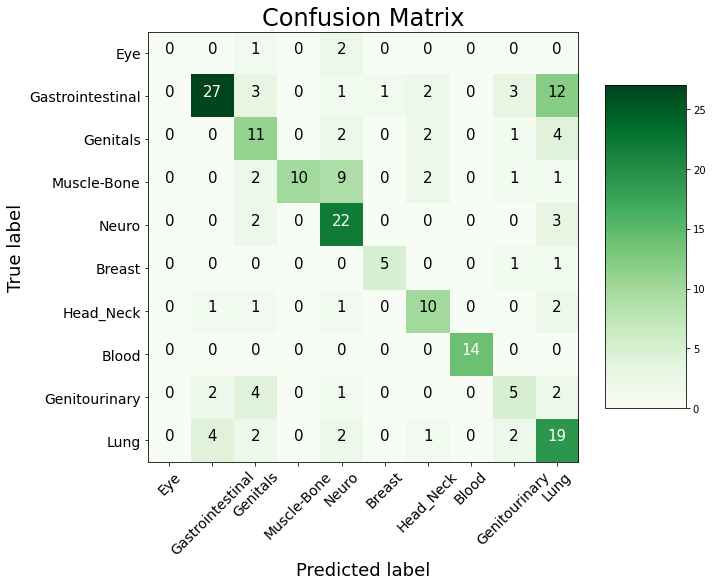

In [83]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')




No change at all :(

**Permutation importance first model**

In [47]:
results = permutation_importance(best_model, X_test, y_test, scoring='neg_mean_squared_error')
nn_importance = results.importances_mean

KeyboardInterrupt: 

In [ ]:
nn_importance[:120].plot.bar(figsize = (25, 10), color = 'r')
plt.title('Neural Network Feature Importance (Top 120)')
plt.xlabel('Features')
plt.show()